# Project 3: Model Tuning and Conclusion
---

Notebook Organisation:
1. Webscraping (SavingMoney & Investing)
2. EDA and Preprocessing
3. **Model Tuning and Insights**

## Content
---

- [Library](#Libraries)
- [Read CSV](#Read-CSV)
- [Train-test Split](#Train-test-Split)
- [Model Tuning](#Model-Tuning)
- [Baseline Accuracy](#Baseline-Accuracy)
- [NB & cvec](#Naive-Bayes-(Multinomial-NB)-and-CountVectorizer)
- [NB & tvec](#Naive-Bayes-(Multinomial-NB)-and-TfidVectorizer)
- [KNN & cvec](#K-Nearest-Neighbors-(KNN)-and-CountVectorizer)
- [KNN & tvec](#K-Nearest-Neighbors-(KNN)-and-TfidVectorizer)
- [LogReg & cvec](#Logistic-Regression-and-CountVectorizer)
- [LogReg & tvec](#Logistic-Regression-and-TfidVectorizer)
- [RF & cvec](#RandomForest-and-CountVectorizer)
- [RF & cvec](#RandomForest-and-TfidVectorizer)
- [Model Selection](#Model-Selection)
- [Model Insight](#Model-Insight)
- [Conculsion](#Conclusion)

## Libraries
---

In [5]:
import requests
import time
import nltk
import pandas as pd
import regex as re
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
import scipy.stats as stats
import warnings
from wordcloud import WordCloud, ImageColorGenerator
import string

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')
sns.set_style('ticks')
%matplotlib inline

## Read CSV
---

In [9]:
combine = pd.read_csv('data/combine_reddit_posts.csv')

## Train-test Split
---

The model will be tested based on three features, the features are the title, the post, and the combination of title and post. This is to show how does each component affects the accuracy of the score.<br>
To faciliate these process, Title will be known as Xt, Post will be known as Xp and the combined will be known as Xc.

#### Split based on title (Xt)

In [10]:
combine.head()

,subreddit,id,title,selftext,title_len,text_len,title_cleaned,selftext_cleaned
0,1,jth9il,"Heads up: If you post a Yotta referral, I'm ju...",I just cleared out the mod queue and HOLY CRAP...,17,16,head post yotta referral straight permabanning...,cleared mod queue holy crap jammed full spammer
1,1,k4tihv,Everything is Negotiable,Throughout my time working at a New York based...,3,925,everything negotiable,throughout time working new york based private...
2,1,k51oue,Best currency and saving bank account? (Advice...,"I'm 20 and I never saved money for ""big projec...",11,119,best currency bank account advice begginer please,never money big project time spain currently l...
3,1,k3ejpc,Looking to switch my bank,Which bank is the most reasonable in terms of ...,5,15,looking switch bank,bank reasonable term monthly payout fee benefi...
4,1,k2dbu9,An uncommon way to actually save money: improv...,"I'm always trying to think smart, and while ev...",11,221,uncommon way actually money improve credit score,always trying think smart everyone going crazy...


In [11]:
Xt = combine['title_cleaned']
y = combine['subreddit']

In [12]:
Xt_train, Xt_test, y_train, y_test = train_test_split(Xt, y,
                                                   test_size = 0.3,
                                                   random_state = 42,
                                                   stratify = y)

In [13]:
Xt_train.shape, y_train.shape, Xt_test.shape, y_test.shape

((604,), (604,), (260,), (260,))

#### Split based on post (Xp)

In [14]:
Xp = combine['selftext_cleaned']

In [15]:
Xp_train, Xp_test, y_train, y_test = train_test_split(Xp, y,
                                                   test_size = 0.3,
                                                   random_state = 42,
                                                   stratify = y)

In [16]:
Xp_train.shape, y_train.shape, Xp_test.shape, y_test.shape

((604,), (604,), (260,), (260,))

#### Split based on title and post (Xc)

In [17]:
combine['titlepost'] = combine['title_cleaned'] + " " + combine['selftext_cleaned']

In [18]:
Xc = combine['titlepost']

In [19]:
Xc_train, Xc_test, y_train, y_test = train_test_split(Xp, y,
                                                   test_size = 0.3,
                                                   random_state = 42,
                                                   stratify = y)

In [20]:
Xc_train.shape, y_train.shape, Xc_test.shape, y_test.shape

((604,), (604,), (260,), (260,))

## Model Tuning
---

### Baseline Accuracy

The baseline accuracy serves as score to compare against our model. In any case, the simplest model will give a 41% chance of classifying it correctly.

In [21]:
combine['subreddit'].value_counts(normalize=True)

0    0.582176
1    0.417824
Name: subreddit, dtype: float64

### Naive Bayes (Multinomial NB) and CountVectorizer
---

For the Naive Bayes model, Tfid Vectorizer seems to score better when compare with the Count Vectorizer. This shows the the weightage of a word count when applied within Naive Bayes, it provides a higher accuracy as compared to using Count Vectorizer.

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.
[Source](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

TfidfVectorizer and CountVectorizer both are methods for converting text data into vectors as model can process only numerical data. In CountVectorizer we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently.In TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.
[Source](https://www.quora.com/What-is-the-difference-between-TfidfVectorizer-and-CountVectorizer-1)

In [22]:
#Creates pipeline to handle vectorization and logistic regression steps
pipe_cnb = Pipeline([
    ('cvec', CountVectorizer(stop_words = 'english')),
    ('nb', MultinomialNB())
     ])

#Specifies different hyperparameter values that we want to test across
params_cnb = {
    'cvec__max_features': [2000, 3000, 4000],
    'cvec__ngram_range':[(1,3)],
    'cvec__min_df':[2,3],
    'cvec__max_df': [0.9, 0.95],
    'nb__fit_prior': [True, False],
    'nb__alpha': [0, 0.4, 0.8]
}

In [23]:
gsnb = GridSearchCV(pipe_cnb, 
                    param_grid = params_cnb,
                    n_jobs = -1,
                    cv=5, verbose=1)

#### Scoring based on title

In [24]:
gsnb.fit(Xt_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    5.3s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000],
                         'cvec__min_df': [2, 3], 'cvec__ngram_range': [(1, 3)],
                         'nb__alpha': [0, 0.4, 0.8],
                         'nb__fit_prior': [True, False]},
             verbose=1)

In [25]:
# Score our model on the training set.
gsnb.score(Xt_train, y_train)

0.9089403973509934

In [26]:
# Score our model on the testing set.
gsnb.score(Xt_test, y_test)

0.8192307692307692

In [27]:
pred = gsnb.predict(Xt_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 131
False Positives: 20
False Negatives: 27
True Positives: 82


**Observation for NB(cvec)[title]**: The accuracy for based on train and test is low despite with train being 90.89% while test bring 81.92%. With the train and test being almost 10% apart, the model is overfitted and should be avoided.

#### Scoring based on post

In [28]:
gsnb.fit(Xp_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   23.9s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000],
                         'cvec__min_df': [2, 3], 'cvec__ngram_range': [(1, 3)],
                         'nb__alpha': [0, 0.4, 0.8],
                         'nb__fit_prior': [True, False]},
             verbose=1)

In [29]:
# Score our model on the training set.
gsnb.score(Xp_train, y_train)

0.9668874172185431

In [30]:
# Score our model on the testing set.
gsnb.score(Xp_test, y_test)

0.9461538461538461

In [31]:
pred = gsnb.predict(Xp_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 141
False Positives: 10
False Negatives: 4
True Positives: 105


**Observation for NB(cvec)[post]**: The accuracy for based on train and test is high with train being 95.53% while test bring 93.84%. The score between train and test is quite close (~2% apart), this model can be considered to be selected but the accuracy is only 93.84% which means that it has still a 6.15% where the model is unable to predict.

#### Scoring based on title & post

In [32]:
gsnb.fit(Xc_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   22.5s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000],
                         'cvec__min_df': [2, 3], 'cvec__ngram_range': [(1, 3)],
                         'nb__alpha': [0, 0.4, 0.8],
                         'nb__fit_prior': [True, False]},
             verbose=1)

In [33]:
# Score our model on the training set.
gsnb.score(Xc_train, y_train)

0.9668874172185431

In [34]:
# Score our model on the testing set.
gsnb.score(Xc_test, y_test)

0.9461538461538461

In [35]:
pred = gsnb.predict(Xc_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 141
False Positives: 10
False Negatives: 4
True Positives: 105


**Observation for NB(cvec)[combine]**: The accuracy for based on train and test is high with train being 95.53% while test bring 93.84%. The score between train and test is quite close (~2% apart), this model can be considered to be selected but the accuracy is only 93.84% which means that it has still a 6.15% where the model is unable to predict.
Note: the score is also similar to NB(cvec)[post]

### Naive Bayes (Multinomial NB) and TfidVectorizer
---

In [36]:
#Creates pipeline to handle vectorization and logistic regression steps
pipe_tnb = Pipeline([
    ('tvec', TfidfVectorizer(stop_words = 'english')),
    ('nb', MultinomialNB())
     ])

#Specifies different hyperparameter values that we want to test across
params_tnb = {
    'tvec__max_features': [2000, 3000, 4000],
    'tvec__ngram_range':[(1,3)],
    'tvec__min_df':[2,3],
    'tvec__max_df': [0.9, 0.95],
    'nb__fit_prior': [True, False],
    'nb__alpha': [0, 0.4, 0.8]
}

In [37]:

gstnb = GridSearchCV(pipe_tnb, 
                    param_grid = params_tnb,
                    n_jobs = -1,
                    cv=5, verbose=1)

#### Scoring based on title

In [38]:
gstnb.fit(Xt_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    1.4s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words='english')),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': [0, 0.4, 0.8],
                         'nb__fit_prior': [True, False],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 3)]},
             verbose=1)

In [39]:
# Score our model on the training set.
gstnb.score(Xt_train, y_train)

0.9172185430463576

In [40]:
# Score our model on the testing set.
gstnb.score(Xt_test, y_test)

0.8115384615384615

In [41]:
pred = gstnb.predict(Xt_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 129
False Positives: 22
False Negatives: 27
True Positives: 82


**Observation for NB(tvec)[title]**: The accuracy for based on train and test is low despite with train being 91.72% while test bring 81.15%. With the train and test being almost 10% apart, the model is overfitted and should be avoided.

#### Scoring based on post

In [42]:
gstnb.fit(Xp_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   22.6s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words='english')),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': [0, 0.4, 0.8],
                         'nb__fit_prior': [True, False],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 3)]},
             verbose=1)

In [43]:
# Score our model on the training set.
gstnb.score(Xp_train, y_train)

0.9867549668874173

In [44]:
# Score our model on the testing set.
gstnb.score(Xp_test, y_test)

0.95

In [45]:
pred = gstnb.predict(Xp_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 144
False Positives: 7
False Negatives: 6
True Positives: 103


**Observation for NB(tvec)[post]**: The accuracy for based on train and test is high with train being 98.68% while test bring 95%. The score between train and test is quite close (~3% apart), this model can be considered to be selected as it also has the best accuracy amongst all model. Based on the computing timing to fit the model, it also takes lesser time comparing with the second best mondel to NB(tvec)[combine]

#### Scoring based on title and post

In [46]:
gstnb.fit(Xc_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   22.5s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words='english')),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': [0, 0.4, 0.8],
                         'nb__fit_prior': [True, False],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 3)]},
             verbose=1)

In [47]:
# Score our model on the training set.
gstnb.score(Xc_train, y_train)

0.9867549668874173

In [48]:
# Score our model on the testing set.
gstnb.score(Xc_test, y_test)

0.95

In [49]:
pred = gstnb.predict(Xc_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 144
False Positives: 7
False Negatives: 6
True Positives: 103


**Observation for NB(tvec)[combine]**: The accuracy for based on train and test is high with train being 98.68% while test bring 95%. The score between train and test is quite close (~3% apart), this model can be considered to be selected as it also has the best accuracy amongst all model. However, when comparing computing timing to fit the model, it takes longer time comparing with NB(tvec)[post]. This is due to additional time required to compute both the title and post as one input. 

### K Nearest Neighbors (KNN) and CountVectorizer
---

While KNN is one of the model used in ML, in this scenario the models are overfitted and results of accuracy are low for test data. When using CountVectorizer, the test score is grossly overfitted when compared with the test data. However, it works differently for TdifVectorizer as the model is not overfitted for post and has one of highest accuracy when compared with other models.

[Source](https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_knn_algorithm_finding_nearest_neighbors.htm)

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well −
- Lazy learning algorithm − KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.
- Non-parametric learning algorithm − KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data. 

In [50]:
pipe_cknn = Pipeline([
    ('cvec', CountVectorizer(stop_words = 'english')),
    ("knn", KNeighborsClassifier(n_neighbors = 5))
])

In [51]:
# setting the params for KNN
params_cknn = {
    'knn__n_neighbors': range(1, 51, 10),
    'knn__p': [1, 2],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

In [52]:
# Instantiate our GridSearchCV object.
gs_cknn = GridSearchCV(pipe_cknn,
                      param_grid=params_cknn,
                      n_jobs = -1,
                      cv=5,
                      verbose=1)

#### Scoring based on title

In [53]:
gs_cknn.fit(Xt_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.7s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': range(1, 51, 10), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             verbose=1)

In [54]:
# Score our model on the training set.
gs_cknn.score(Xt_train, y_train)

1.0

In [55]:
# Score our model on the testing set.
gs_cknn.score(Xt_test, y_test)

0.5615384615384615

In [56]:
pred = gs_cknn.predict(Xt_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 40
False Positives: 111
False Negatives: 3
True Positives: 106


**Observation for KNN(cvec)[title]**: The model is serverly overfitted and should be avoided as the train and test is almost 45% apart.

#### Scoring based on post

In [57]:
gs_cknn.fit(Xp_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': range(1, 51, 10), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             verbose=1)

In [58]:
# Score our model on the training set.
gs_cknn.score(Xp_train, y_train)

1.0

In [59]:
# Score our model on the testing set.
gs_cknn.score(Xp_test, y_test)

0.5923076923076923

In [60]:
pred = gs_cknn.predict(Xp_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 47
False Positives: 104
False Negatives: 2
True Positives: 107


**Observation for KNN(cvec)[post]**: The model is serverly overfitted and should be avoided as the train and test is almost 40 apart.

#### Scoring based on title & post

In [61]:
gs_cknn.fit(Xc_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': range(1, 51, 10), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             verbose=1)

In [62]:
# Score our model on the training set.
gs_cknn.score(Xc_train, y_train)

1.0

In [63]:
# Score our model on the testing set.
gs_cknn.score(Xc_test, y_test)

0.5923076923076923

In [64]:
pred = gs_cknn.predict(Xc_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 47
False Positives: 104
False Negatives: 2
True Positives: 107


**Observation for KNN(cvec)[combine]**: The model is serverly overfitted and should be avoided as the train and test is almost 40 apart.

### KNN and TfidVectorizer
---

In [65]:
#Creates pipeline to handle vectorization and logistic regression steps
pipe_tknn = Pipeline([
    ('tvec', TfidfVectorizer(stop_words = 'english')),
    ("knn", KNeighborsClassifier(n_neighbors = 5))
     ])

#Specifies different hyperparameter values that we want to test across
params_tknn = {
    'tvec__max_features': [2000, 3000, 4000],
    'tvec__ngram_range':[(1,3)],
    'tvec__min_df':[2,3],
    'tvec__max_df': [0.9, 0.95],
    'knn__n_neighbors': range(1, 51, 10),
    'knn__p': [1, 2],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

In [66]:
# Instantiate our GridSearchCV object.
gs_tknn = GridSearchCV(pipe_tknn,
                      param_grid=params_tknn,
                      n_jobs = -1,
                      cv=5,
                      verbose=1)

#### Scoring based on title

In [67]:
gs_tknn.fit(Xt_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:   18.3s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words='english')),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': range(1, 51, 10), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance'],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 3)]},
             verbose=1)

In [68]:
# Score our model on the training set.
gs_tknn.score(Xt_train, y_train)

0.8294701986754967

In [69]:
# Score our model on the testing set.
gs_tknn.score(Xt_test, y_test)

0.7730769230769231

In [70]:
pred = gs_tknn.predict(Xt_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 117
False Positives: 34
False Negatives: 25
True Positives: 84


**Observation for KNN(tvec)[title]**: Despite TfidVectorizer increasing the accuracy of the KNN model as compared to cvec, the test accuracy is still relative low as compared to other models. Hence, this model should be avoided too.

#### Scoring based on post

In [71]:
gs_tknn.fit(Xp_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  2.4min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words='english')),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': range(1, 51, 10), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance'],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 3)]},
             verbose=1)

In [72]:
# Score our model on the training set.
gs_tknn.score(Xp_train, y_train)

1.0

In [73]:
# Score our model on the testing set.
gs_tknn.score(Xp_test, y_test)

0.9384615384615385

In [74]:
pred = gs_tknn.predict(Xp_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 142
False Positives: 9
False Negatives: 7
True Positives: 102


**Observation for KNN(tvec)[post]**: In this scenario, the TfidVectorizer increases the accuracy of the KNN model as compared to cvec, the test accuracy is also one of the best comparing with other model. However, this is still not the best accuracy when compared with NB(tvec)[post].

#### Scoring based on title & post

In [75]:
gs_tknn.fit(Xc_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  2.4min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words='english')),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': range(1, 51, 10), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance'],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 3)]},
             verbose=1)

In [76]:
# Score our model on the training set.
gs_tknn.score(Xc_train, y_train)

1.0

In [77]:
# Score our model on the testing set.
gs_tknn.score(Xc_test, y_test)

0.9384615384615385

In [78]:
pred = gs_tknn.predict(Xc_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 142
False Positives: 9
False Negatives: 7
True Positives: 102


**Observation for KNN(tvec)[combine]**: In this scenario, the TfidVectorizer increases the accuracy of the KNN model as compared to cvec, the test accuracy is also one of the best comparing with other model. However, this is still not the best accuracy when compared with NB(tvec)[post]

### Logistic Regression and CountVectorizer
---

Logistic Regression on avarage provided 90% accuracy for most of it model between the two vectorizer and features applied. However, the top accuracy is still lower when compared with Naive Bayes. Hence, this model was not selected.

In [79]:
#Creates pipeline to handle vectorization and logistic regression steps
pipe_clr = Pipeline([
    ('cvec', CountVectorizer(stop_words = 'english')),
    ('lr', LogisticRegression(solver = 'lbfgs'))
     ])

#Specifies different hyperparameter values that we want to test across
params_clr = {
    'cvec__max_features': [3000, 4000, 5000, 10000],
    'cvec__ngram_range':[(1,3)],
    'cvec__min_df':[2,3],
    'cvec__max_df': [0.9, 0.95],
    'lr__max_iter': [1000],
    'lr__penalty':['l2','l1'],
    'lr__C':[0.1, 1, 10],
}

In [80]:
#Executes GridSearch
gslr = GridSearchCV(pipe_clr, 
                    param_grid = params_clr,
                    n_jobs = -1,
                    cv=5, verbose=1)

#### Scoring based on title

In [81]:
gslr.fit(Xt_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    2.1s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [3000, 4000, 5000, 10000],
                         'cvec__min_df': [2, 3], 'cvec__ngram_range': [(1, 3)],
                         'lr__C': [0.1, 1, 10], 'lr__max_iter': [1000],
                         'lr__penalty': ['l2', 'l1']},
             verbose=1)

In [82]:
#Training data accuracy score
gslr.score(Xt_train, y_train)

0.9354304635761589

In [83]:
# Score our model on the testing set.
gslr.score(Xt_test, y_test)

0.8153846153846154

In [84]:
pred = gslr.predict(Xt_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 137
False Positives: 14
False Negatives: 34
True Positives: 75


**Observation for LR(cvec)[title]**: The Logistic Regression Model on title indicates that the model is overfitted when comparing the train and test scoring. This model should be avoid for prediction.

#### Scoring based on post

In [85]:
gslr.fit(Xp_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   28.7s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [3000, 4000, 5000, 10000],
                         'cvec__min_df': [2, 3], 'cvec__ngram_range': [(1, 3)],
                         'lr__C': [0.1, 1, 10], 'lr__max_iter': [1000],
                         'lr__penalty': ['l2', 'l1']},
             verbose=1)

In [86]:
#Training data accuracy score
gslr.score(Xp_train, y_train)

0.9917218543046358

In [87]:
# Score our model on the testing set.
gslr.score(Xp_test, y_test)

0.9230769230769231

In [88]:
pred = gslr.predict(Xp_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 136
False Positives: 15
False Negatives: 5
True Positives: 104


**Observation for LR(cvec)[post]**: The test accuracy is better comparing with title indicating post provides a better accuracy comparing with title. However, the accuracy is still lower when compared to NB(tvec)[post].

#### Scoring based on title & post

In [89]:
gslr.fit(Xc_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   29.9s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [3000, 4000, 5000, 10000],
                         'cvec__min_df': [2, 3], 'cvec__ngram_range': [(1, 3)],
                         'lr__C': [0.1, 1, 10], 'lr__max_iter': [1000],
                         'lr__penalty': ['l2', 'l1']},
             verbose=1)

In [90]:
#Training data accuracy score
gslr.score(Xc_train, y_train)

0.9917218543046358

In [91]:
# Score our model on the testing set.
gslr.score(Xc_test, y_test)

0.9230769230769231

In [92]:
pred = gslr.predict(Xc_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 136
False Positives: 15
False Negatives: 5
True Positives: 104


**Observation for LR(cvec)[combine]**: The test accuracy is better comparing with title indicating post provides a better accuracy comparing with title. However, the accuracy is still lower when compared to NB(tvec)[post].

### Logistic Regression and TfidVectorizer
---

In [93]:
#Creates pipeline to handle vectorization and logistic regression steps
pipeTlr = Pipeline([
    ('tvec', TfidfVectorizer(stop_words = 'english')),
    ('lr', LogisticRegression(solver = 'lbfgs'))
     ])

#Specifies different hyperparameter values that we want to test across
paramsTlr = {
    'tvec__max_features': [2000, 3000, 4000],
    'tvec__ngram_range':[(1,3)],
    'tvec__min_df':[2,3],
    'tvec__max_df': [0.9, 0.95],
    'lr__penalty':['l2','l1'],
    'lr__C':[0.1, 1, 10],
}

In [94]:
#Executes GridSearch
gsTlr = GridSearchCV(pipeTlr, 
                    param_grid = paramsTlr,
                    n_jobs = -1,
                    cv=5, verbose=1)

#### Scoring based on title

In [95]:
gsTlr.fit(Xt_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    1.7s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words='english')),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.1, 1, 10], 'lr__penalty': ['l2', 'l1'],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 3)]},
             verbose=1)

In [96]:
# Score our model on the training set.
gsTlr.score(Xt_train, y_train)

0.9586092715231788

In [97]:
# Score our model on the testing set.
gsTlr.score(Xt_test, y_test)

0.8038461538461539

In [98]:
pred = gsTlr.predict(Xt_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 133
False Positives: 18
False Negatives: 33
True Positives: 76


**Observation for LR(tvec)[title]**: This model is overfitted with the train and test score being 15% apart and should be avoided.

#### Scoring based on post

In [99]:
gsTlr.fit(Xp_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   20.2s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words='english')),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.1, 1, 10], 'lr__penalty': ['l2', 'l1'],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 3)]},
             verbose=1)

In [100]:
# Score our model on the training set.
gsTlr.score(Xp_train, y_train)

0.9983443708609272

In [101]:
# Score our model on the testing set.
gsTlr.score(Xp_test, y_test)

0.9153846153846154

In [102]:
pred = gsTlr.predict(Xp_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 140
False Positives: 11
False Negatives: 11
True Positives: 98


**Observation for LR(tvec)[post]**: While the train score shows a very good accuracy scoring, the test scoring is not as good comparing with other models. There are also signs of overfitting with train and test being almost 10% apart.

#### Scoring based on title and post

In [103]:
gsTlr.fit(Xc_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   20.2s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words='english')),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.1, 1, 10], 'lr__penalty': ['l2', 'l1'],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 3)]},
             verbose=1)

In [104]:
gsTlr.score(Xc_train, y_train)

0.9983443708609272

In [105]:
# Score our model on the testing set.
gsTlr.score(Xc_test, y_test)

0.9153846153846154

In [106]:
pred = gsTlr.predict(Xc_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 140
False Positives: 11
False Negatives: 11
True Positives: 98


**Observation for LR(tvec)[combine]**: While the train score shows a very good accuracy scoring, the test scoring is not as good comparing with other models. There are also signs of overfitting with train and test being almost 10% apart.

### RandomForest and CountVectorizer
---

While RandomForest tend to combat overfitting, the accuracy of the model is still lower when compared with other models.

[Source](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [107]:
#Creates pipeline to handle vectorization and logistic regression steps
piperf = Pipeline([
    ('cvec', CountVectorizer(stop_words = 'english')),
    ('rf', RandomForestClassifier()),
     ])

#Specifies different hyperparameter values that we want to test across
paramsrf = {
    'cvec__max_features': [3000, 4000, 5000],
    'cvec__ngram_range':[(1,3)],
    'cvec__min_df':[2,3],
    'cvec__max_df': [0.9, 0.95],
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth': [None, 1, 2, 3, 4, 5],
}

In [108]:
#Executes GridSearch
gsrf = GridSearchCV(piperf, 
                    param_grid = paramsrf,
                    n_jobs = -1,
                    cv=5, verbose=1)

#### Scoring based on title

In [109]:
gsrf.fit(Xt_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   50.9s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [3000, 4000, 5000],
                         'cvec__min_df': [2, 3], 'cvec__ngram_range': [(1, 3)],
                         'rf__max_depth': [None, 1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150, 200]},
             verbose=1)

In [110]:
gsrf.score(Xt_train, y_train)

0.9321192052980133

In [111]:
gsrf.score(Xt_test, y_test)

0.7538461538461538

In [112]:
pred = gsrf.predict(Xt_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 119
False Positives: 32
False Negatives: 32
True Positives: 77


**Observation for RF(cvec)[title]**: Model is serverly overfitted with the train and test score being 20% apart. This model should be avoided.

#### Scoring based on post

In [113]:
gsrf.fit(Xp_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.9min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [3000, 4000, 5000],
                         'cvec__min_df': [2, 3], 'cvec__ngram_range': [(1, 3)],
                         'rf__max_depth': [None, 1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150, 200]},
             verbose=1)

In [114]:
gsrf.score(Xp_train, y_train)

1.0

In [115]:
gsrf.score(Xp_test, y_test)

0.9076923076923077

In [116]:
pred = gsrf.predict(Xp_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 134
False Positives: 17
False Negatives: 7
True Positives: 102


**Observation for RF(cvec)[post]**: The model score well in both train and test with train being 100% and test being 92.3%. This model is one of the best among the rest but it requires longer computing time when fitting and the accuracy score is still lower than a few of the other models.

#### Scoring based on title and post

In [117]:
gsrf.fit(Xc_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.8min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [3000, 4000, 5000],
                         'cvec__min_df': [2, 3], 'cvec__ngram_range': [(1, 3)],
                         'rf__max_depth': [None, 1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150, 200]},
             verbose=1)

In [118]:
gsrf.score(Xc_train, y_train)

1.0

In [119]:
gsrf.score(Xc_test, y_test)

0.9153846153846154

In [120]:
pred = gsrf.predict(Xc_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 135
False Positives: 16
False Negatives: 6
True Positives: 103


**Observation for RF(cvec)[combine]**: Based on the cvec model of combine, the accuracy lowers as compared to the model with purely post. This may be due to the features selected in combine is doing poorer than the features selected in post. Hence, the overall accuracy is lower despite getting a perfect score in the train dataset. 

### RandomForest and TfidVectorizer
---

In [121]:
#Creates pipeline to handle vectorization and logistic regression steps
pipe_trf = Pipeline([
    ('tvec', TfidfVectorizer(stop_words = 'english')),
    ('rf', RandomForestClassifier()),
     ])

#Specifies different hyperparameter values that we want to test across
params_trf = {
    'tvec__max_features': [2000, 3000, 4000],
    'tvec__ngram_range':[(1,3)],
    'tvec__min_df':[2,3],
    'tvec__max_df': [0.9, 0.95],
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth': [None, 1, 2, 3, 4, 5],
}

In [122]:
#Executes GridSearch
gs_trf = GridSearchCV(pipe_trf, 
                    param_grid = params_trf,
                    n_jobs = -1,
                    cv=5, verbose=1)

#### Scoring based on title

In [123]:
gs_trf.fit(Xt_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   52.3s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words='english')),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150, 200],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 3)]},
             verbose=1)

In [124]:
gs_trf.score(Xt_train, y_train)

0.9668874172185431

In [125]:
gs_trf.score(Xt_test, y_test)

0.7846153846153846

In [126]:
pred = gs_trf.predict(Xt_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 115
False Positives: 36
False Negatives: 20
True Positives: 89


**Observation for RF(tvec)[title]**: The model is serverly overfitted and should be avoided. As title itself does not seem to be a good feature to use, the scores are generally lower than post and combine. This may be due to limited data points within title as compare to post and combine. On top of that, this model is serverly overfitted with the scores almost 20% apart from each other. 

#### Scoring based on post

In [127]:
gs_trf.fit(Xp_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.9min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words='english')),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150, 200],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 3)]},
             verbose=1)

In [128]:
gs_trf.score(Xp_train, y_train)

1.0

In [129]:
gs_trf.score(Xp_test, y_test)

0.9115384615384615

In [130]:
pred = gs_trf.predict(Xp_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 134
False Positives: 17
False Negatives: 6
True Positives: 103


**Observation for RF(tvec)[post]**: Comparing the model with cvec, the model with cvec scored better as compared to the model with tvec. This shows that the weight based on the frequency of the word(tvec) as compared to giving equal weightage(cvec) performed in an not ideal way for this case. The model is also overfitted with more than 10% apart despite the train score getting a perfect 100%.

#### Scoring based on title and post

In [131]:
gs_trf.fit(Xc_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.9min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words='english')),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150, 200],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 3)]},
             verbose=1)

In [132]:
gs_trf.score(Xc_train, y_train)

1.0

In [133]:
gs_trf.score(Xc_test, y_test)

0.9115384615384615

In [134]:
pred = gs_trf.predict(Xc_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 134
False Positives: 17
False Negatives: 6
True Positives: 103


**Observation for RF(tvec)[combine]**: Looking at four different models within Rf, there is a difference within cvec and tvec with the input from post and combine. While combine scored better using tvec, the post did better when using cvec. However, this may also be due to features selected by random forest which cost the accuracy to increase.

## Model Selection
---

Among all the models that were tested, the best model and feature with the highest accuracy is **Naive Bayes (Multinominal NB) with Tfid Vectorizer** with the highest accuracy of **95%** among all the models that have been tested. While some have a higher accuracy in the train model, the accuracy tells otherwise in the test set. This indicates that the model is overfitting and hence does not work well with new data set. <br>

Among the features, the 'title' feature performed the worst in terms of accuracy while 'post' and 'combine' scored on par until it was past through the RandomForest Model. However, comparing the computing time based on the best model, using 'post' as the feature proves to require less computing time. Hence, 'post' is sufficient to be used as a prediction.<br>


In summary, **NB with Tfid coupled with post** as the feature shows a better results among the rest.

**Model Comparison**

|S/N|Model|Vectorizer|Feature|Train|Test|TN|FP|FN|TP
|---|---|---|---|---|---|---|---|---|---|
|1|Naive Bayes (Multinomial NB)|cvec|title|0.9089|0.8192|131|20|27|82|
|2|Naive Bayes (Multinomial NB)|cvec|post|0.9669|0.9462|141|10|4|105|
|3|Naive Bayes (Multinomial NB)|cvec|combine|0.9669|0.9462|141|10|4|105|
|4|Naive Bayes (Multinomial NB)|tvec|title|0.9172|0.8115|129|22|27|82|
|**5**|**Naive Bayes (Multinomial NB)**|**tvec**|**post**|**0.9867**|**0.95**|**144**|**7**|**6**|**103**|
|6|Naive Bayes (Multinomial NB)|tvec|combine|0.9867|0.95|144|7|6|103|
|7|K Nearest Neighbors (KNN)|cvec|title|1.0|0.5615|40|111|3|106
|8|K Nearest Neighbors (KNN)|cvec|post|1.0|0.5923|47|104|2|107|
|9|K Nearest Neighbors (KNN)|cvec|combine|1.0|0.5923|47|104|2|107|
|10|K Nearest Neighbors (KNN)|tvec|title|0.8294|0.7730|117|34|25|84|
|11|K Nearest Neighbors (KNN)|tvec|post|1.0|0.9346|142|9|7|102|
|12|K Nearest Neighbors (KNN)|tvec|combine|1.0|0.9346|142|9|7|102|
|13|Logistic Regression (LR)|cvec|title|0.9354|0.8153|137|14|34|75|
|14|Logistic Regression (LR)|cvec|post|0.9933|0.9230|136|15|5|104|
|15|Logistic Regression (LR)|cvec|combine|0.9933|0.9230|136|15|5|104|
|16|Logistic Regression (LR)|tvec|title|0.9586|0.8038|133|18|33|76|
|17|Logistic Regression (LR)|tvec|post|0.9983|0.9153|140|11|11|98|
|18|Logistic Regression (LR)|tvec|combine|0.9983|0.9153|140|11|11|98|
|19|Random Forest (RF)|cvec|title|0.9668|0.7615|119|32|32|77|
|20|Random Forest (RF)|cvec|post|1.0|0.9230|134|17|7|102|
|21|Random Forest (RF)|cvec|combine|1.0|0.8923|135|16|6|103|
|22|Random Forest (RF)|tvec|title|0.9668|0.7807|115|36|20|89|
|23|Random Forest (RF)|tvec|post|1.0|0.8961|134|17|6|103|
|24|Random Forest (RF)|tvec|combine|1.0|0.9153|134|17|6|103|

## Model Insight
---

Based on the best model, we look into the top 10 most correlated words(s) for each of the subreddit. As the investment terminology are quite distinct from saving, term like liquidity have a stronger correlation with investment. While for savings, money and account have a strong correlation. <br>

Apart from highly correlated words, there are other words like thank, month and week which are considered misclassified words and should be removed in order to increase the accuracy of the model. This will result in false prediction due to misclassification.

In [135]:
coefs = pd.DataFrame(gstnb.best_estimator_.steps[1][1].coef_).T
coefs.columns = ['coef']
coefs['ngram'] = gstnb.best_estimator_.steps[0][1].get_feature_names()
coefs = coefs[['ngram','coef']]
coefs = coefs.sort_values('coef', ascending=True)

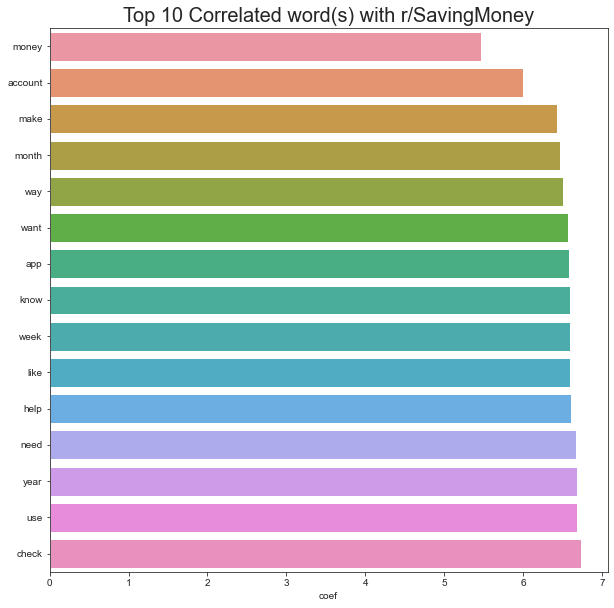

In [136]:
top_investment_coefs = coefs.tail(15).sort_values(by='coef', ascending=False).reset_index(drop=True)
plt.figure(figsize=(10,10))
sns.barplot(data=top_investment_coefs, x=-top_investment_coefs['coef'], y='ngram')
plt.ylabel('')
plt.title('Top 10 Correlated word(s) with r/SavingMoney', fontsize=20);

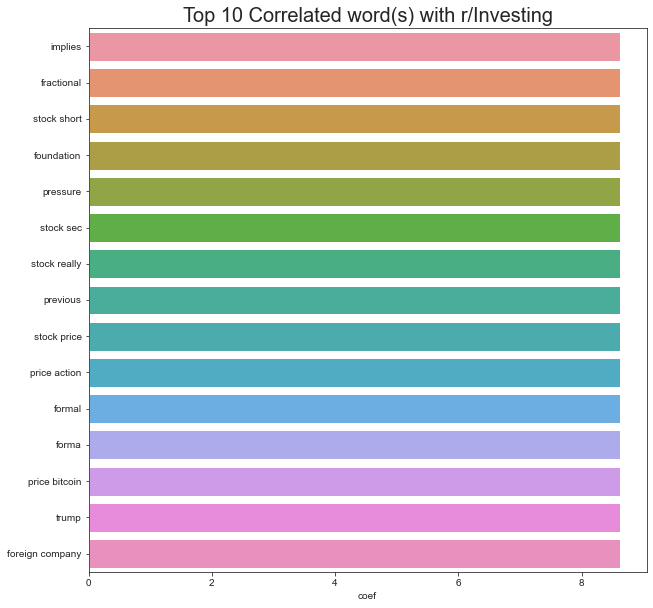

In [137]:
top_saving_coefs = coefs.head(15).reset_index(drop=True)
plt.figure(figsize=(10,10))
sns.barplot(data=top_saving_coefs, x=-top_saving_coefs['coef'], y='ngram')
plt.ylabel('')
plt.title('Top 10 Correlated word(s) with r/Investing', fontsize=20);

In [144]:
#Puts probabilities and text into a dataframe
pred = pd.DataFrame(gstnb.predict_proba(Xp))
pred['text'] = combine['selftext_cleaned']

#Shows the top predicted comments
pred.sort_values(1).head()

,0,1,text
515,0.992489,0.007511,context appulse corp centrifuge manufacturing ...
454,0.991243,0.008757,palantir technology inc posted best week since...
673,0.989508,0.010492,hello decided would comparable analysis major ...
453,0.988205,0.011795,wall street bracing tesla inc nasdaq tsla arri...
368,0.987977,0.012023,hello want highlight point observed market pas...


In [145]:
#Shows the top predicted comments
pred.sort_values(1).tail()

,0,1,text
251,0.015176,0.984824,student working part time job retail really ba...
308,0.013565,0.986435,recently found app called getupside let certai...
45,0.012238,0.987762,hi everyone decent paying job area reasonable ...
77,0.011207,0.988793,anything like average human looking bank accou...
188,0.008435,0.991565,half income one salary requires discipline pos...


## Conclusion
---

In general, both subreddit(r/investing & r/SavingMoney) are quite distinct from one another as the average accuracy of the model ranges from 50 to 90% with the highest being 95%. While both revolves around money, the way in which how the money is utilized is different. Hence, the correlated words used in the prediction is not highly correlated between post as shown in the EDA process. 

During the model selection, the Naive Bayes and TdifVectorizer model is able predict with an accuracy of 95% based on the testing data and 98.6% based on the training. Among all the features, between title, post and combining both, post seems to give the best results in terms of accuracy and computing time. While combing both title and post may increase the accruary, it is limited with the max number of features allowed to pass through the model and requires longer computing time. Among all the model, it proves to be the best as it is not overfitted and has the highest accuracy for test data when identifying saving related post as tasked by our client.

However, the model has some limitation. Currently, there are some misclassified words within the model which will throw the prediction off if the words appears within a post that may not be savings related. The words should be removed to increase the accuracy of the model.
